# 3. Tutorial 2: Epidemiology model (1)

#### Naoki TANI
#### Center for Advanced Policy Studies (CAPS), Institute of Economic Research, Kyoto University
#### April 26, 2023

In [21]:
using Plots

## 1. Simple SIR model

#### There is a continuum of agents of mass $N$. Each agent can be either "Susceptible" ($S$), "Infected" ($I$) or "Recovered" ($R$).
#### $S_t$ represents the number of people at time $t$ who are susceptible to the disease infection. 
#### $I_t$ is the number of infected agents at time $t$ who recover with probability $\gamma$ and die with probability $\delta$.
#### $R_t$ is the number of agents at time $t$ who recovered from the infected state.
#### In each period, one agent meets another agent drawn randomly. If Susceptible agents meet an Infected agent, they always catch the disease. $\beta$ is the rate at which agents are exposed to infected people. For sake of simplicity, Recovered agents never get infected with the disease even when they meet Infected agents.

#### The model can be writen as:

$S_{t} = S_{t-1} - \frac{\beta S_{t-1}I_{t-1}}{N_{t}}$

$I_{t} = I_{t-1} + \frac{\beta S_{t-1}I_{t-1}}{N_{t}} - \delta I_{t-1} - \gamma I_{t-1}$

$R_{t} =  R_{t-1} + \gamma I_{t-1}$

$ N_{t} = S_{t} + I_{t} + R_{t}$ 

In [5]:
# define the parameters
struct Parameters
    β₁ ::Float64 #without lockdown
    β₂ ::Float64 #with lockdown
    δ ::Float64 #death rate
    γ ::Float64 ##recovery rate
end

In [6]:
p = Parameters(0.2,0.01,0.014,0.03)

Parameters(0.2, 0.01, 0.014, 0.03)

In [7]:
# define the transition function
function f(s)
    S_t, I_t, R_t = s #initial state
    S_tt = S_t - p.β₁*S_t*I_t/(S_t + I_t + R_t)
    I_tt = I_t + p.β₁*S_t*I_t/(S_t + I_t + R_t) - p.δ*I_t - p.γ*I_t
    R_tt = R_t + p.γ*I_t
    return [S_tt, I_tt, R_tt]
end

f (generic function with 1 method)

In [9]:
f([10.0, 5.0, 5.0]) 

3-element Vector{Float64}:
 9.5
 5.279999999999999
 5.15

In [17]:
# simulate the transitions over T periods
function simulate(v0,f,T)
    sim  = Vector{Float64}[]
    for t=1:T
        push!(sim, v0)
        v1 = f(v0)
        v0 = v1
    end
    return hcat(sim...) #creat a matrix from a vector of vectors
end

simulate (generic function with 1 method)

In [18]:
T = 500
v0 = [10.0, 2.0, 0.0]

3-element Vector{Float64}:
 10.0
  2.0
  0.0

In [19]:
simulate(v0,f,T)

3×500 Matrix{Float64}:
 10.0  9.66667  9.30407  8.91305   …  0.0349691   0.0349691   0.0349691
  2.0  2.24533  2.50913  2.78975      6.47062e-9  6.19143e-9  5.9243e-9
  0.0  0.06     0.12736  0.202634     8.15798     8.15798     8.15798

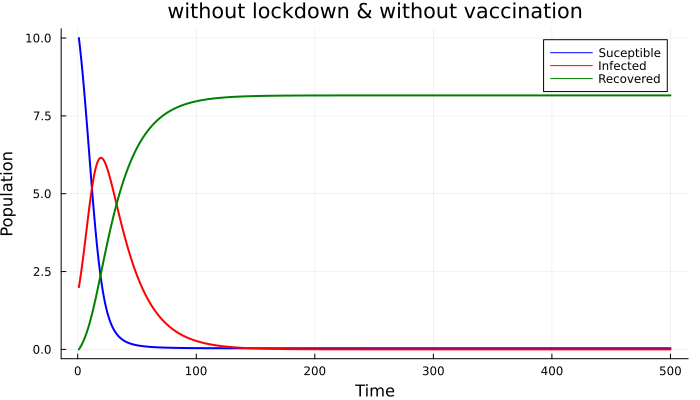

In [22]:
sim1 = simulate(v0,f,T)
Plots.plot(1:T,
    [sim1[1,:], sim1[2,:], sim1[3,:]], 
    xlabel     = "Time",
    ylabel     = "Population",
    title      = "without lockdown & without vaccination",
    label      = ["Suceptible" "Infected" "Recovered"],
    linecolor  = [:blue :red :green],
    linewidth  = 2, 
    #linestyle  = [:solid :dash],
    size       = (700,400), 
    legend     = :topright,
)

## 2. Exercises

#### $\mathit{Q}$-1. Simulate the transition of the scenario that the government implements lockdown to reduce the infection rate.

In [23]:
# define the transition function
function L(s)
    S_t, I_t, R_t = s #initial state
    S_tt =
    I_tt = 
    R_tt = 
    return [S_tt, I_tt, R_tt]

end

L (generic function with 1 method)

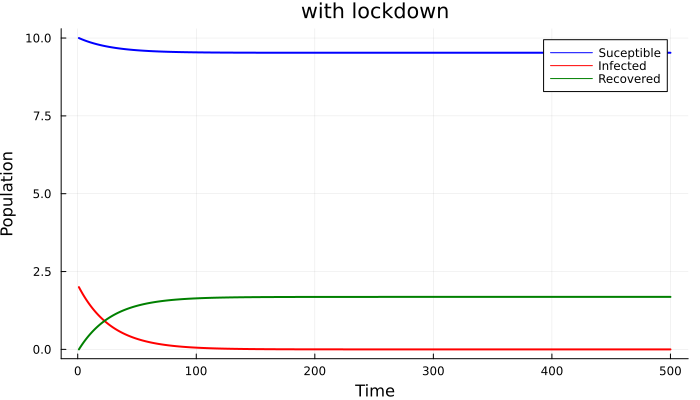

In [24]:
sim2 = simulate(v0,L,T)
Plots.plot(1:T,
    [sim2[1,:], sim2[2,:], sim2[3,:]], 
    xlabel     = "Time",
    ylabel     = "Population",
    title      = "with lockdown",
    label      = ["Suceptible" "Infected" "Recovered"],
    linecolor  = [:blue :red :green],
    linewidth  = 2, 
    #linestyle  = [:solid :dash],
    size       = (700,400), 
    legend     = :topright,
)

#### $\mathit{Q}$-2. Plot the transtion of new cases in both scenarios (with lockdown and without lockdown).

In [25]:
# redefine the function f(s)
function fn(s)
    S_t, I_t, R_t, new_t = s #initial state
    S_tt = 
    I_tt = 
    R_tt = 
    new_tt = 
    return [S_tt, I_tt, R_tt, new_tt]
end

fn (generic function with 1 method)

In [26]:
# redefine the function l(s)
function Ln(s)
    S_t, I_t, R_t, new_t = s #initial state
    S_tt = 
    I_tt = 
    R_tt = 
    new_tt = 
    return [S_tt, I_tt, R_tt, new_tt]
end

Ln (generic function with 1 method)

In [56]:
v0_new = [10.0, 2.0, 0.0, 0.3]

4-element Vector{Float64}:
 10.0
  2.0
  0.0
  0.3

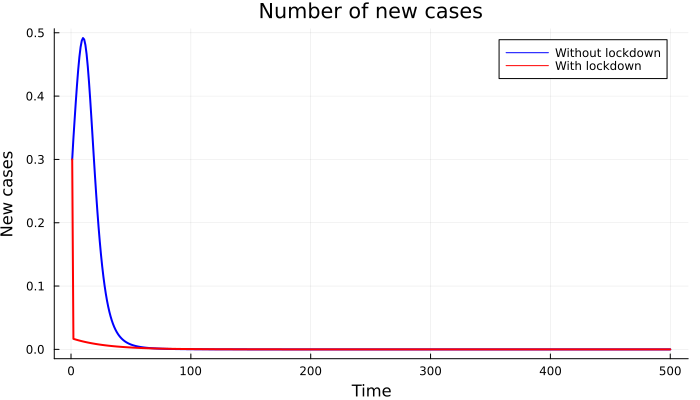

In [57]:
sim3 = simulate(v0_new,fn,T)
sim4 = simulate(v0_new,Ln,T)
Plots.plot(1:T,
    [sim3[4,:], sim4[4,:]], 
    xlabel     = "Time",
    ylabel     = "New cases",
    title      = "Number of new cases",
    label      = ["Without lockdown" "With lockdown"],
    linecolor  = [:blue :red],
    linewidth  = 2, 
    #linestyle  = [:solid :dash],
    size       = (700,400), 
    legend     = :topright,
)

#### $\mathit{Q}$-3. Plot the variation of transtions of new cases depending on $\beta$.

fn (generic function with 2 methods)

simulate (generic function with 2 methods)

500-element Vector{Float64}:
 0.3
 0.3333333333333333
 0.3625942012844786
 0.39102259192903144
 0.4177118757622976
 0.4416798689528498
 0.46192736613743657
 0.4775122505075792
 0.4876323298180965
 0.4917064766196974
 0.489441552906966
 0.4808730348064978
 0.4663707032688777
 ⋮
 8.585492277660186e-12
 8.215059533247875e-12
 7.860609613622559e-12
 7.52145291805537e-12
 7.196929599580009e-12
 6.886408281226089e-12
 6.589284827642367e-12
 6.304981169719932e-12
 6.032944179928664e-12
 5.772644596178828e-12
 5.523575992114111e-12
 5.285253791832807e-12

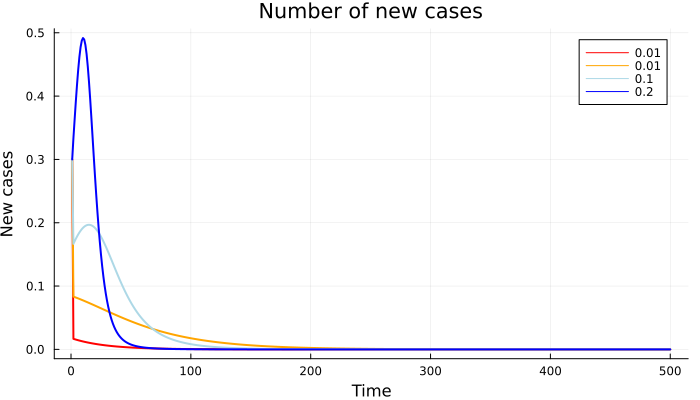

In [61]:
Plots.plot(1:T,
    [sim01, sim05, sim1, sim2], 
    xlabel     = "Time",
    ylabel     = "New cases",
    title      = "Number of new cases",
    label      = ["0.01" "0.01" "0.1" "0.2"],
    linecolor  = [:red :orange :lightblue :blue],
    linewidth  = 2, 
    #linestyle  = [:solid :dash],
    size       = (700,400), 
    legend     = :topright,
)